# 1 - Imports

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
from IPython.display import Image

In [2]:
filterwarnings('ignore')

pd.set_option('display.max_columns', None)

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [18, 8]

sns.set;

## 1.1 - Funções

In [31]:
def price_mean(df, colunas):
    dfg = df.groupby(colunas, as_index=False)['price'].mean()
    return dfg

def price_median(df, colunas):
    dfg = df.groupby(colunas, as_index=False)['price'].median()
    return dfg

## 1.2 - Importando os dados

In [4]:
df = pd.read_csv('kc_house_data.csv')

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# 2 - Descrição dos dados

In [6]:
df2 = df.copy()

In [7]:
print(f'Quantidade de linhas: {df2.shape[0]}')
print(f'Quantidade de colunas: {df2.shape[1]}')

Quantidade de linhas: 21613
Quantidade de colunas: 21


## 2.1 - Dados nulos

In [8]:
df2.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 2.2 - Tipo dos dados

In [9]:
df2['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

df2.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## 2.3 - Dados Duplicados

In [10]:
df2['id'].duplicated().sum()

177

## 2.4 - Análise Descritiva

### 2.4.1 - Análise Numérica

In [11]:
num = df2.drop('date', axis=1)
num.describe().apply(lambda x: x.apply('{0:.2f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
id,21613.00,4580301520.86,2876565571.31,1000102.00,2123049194.00,3904930410.00,7308900445.00,9900000190.00
price,21613.00,540088.14,367127.20,75000.00,321950.00,450000.00,645000.00,7700000.00
bedrooms,21613.00,3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,21613.00,2.11,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,21613.00,2079.90,918.44,290.00,1427.00,1910.00,2550.00,13540.00
sqft_lot,21613.00,15106.97,41420.51,520.00,5040.00,7618.00,10688.00,1651359.00
floors,21613.00,1.49,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,21613.00,0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,21613.00,0.23,0.77,0.00,0.00,0.00,0.00,4.00
condition,21613.00,3.41,0.65,1.00,3.00,3.00,4.00,5.00


# 3 - Feature Engineering

In [12]:
df3 = df2.copy()

## 3.1 - Mapa Mental

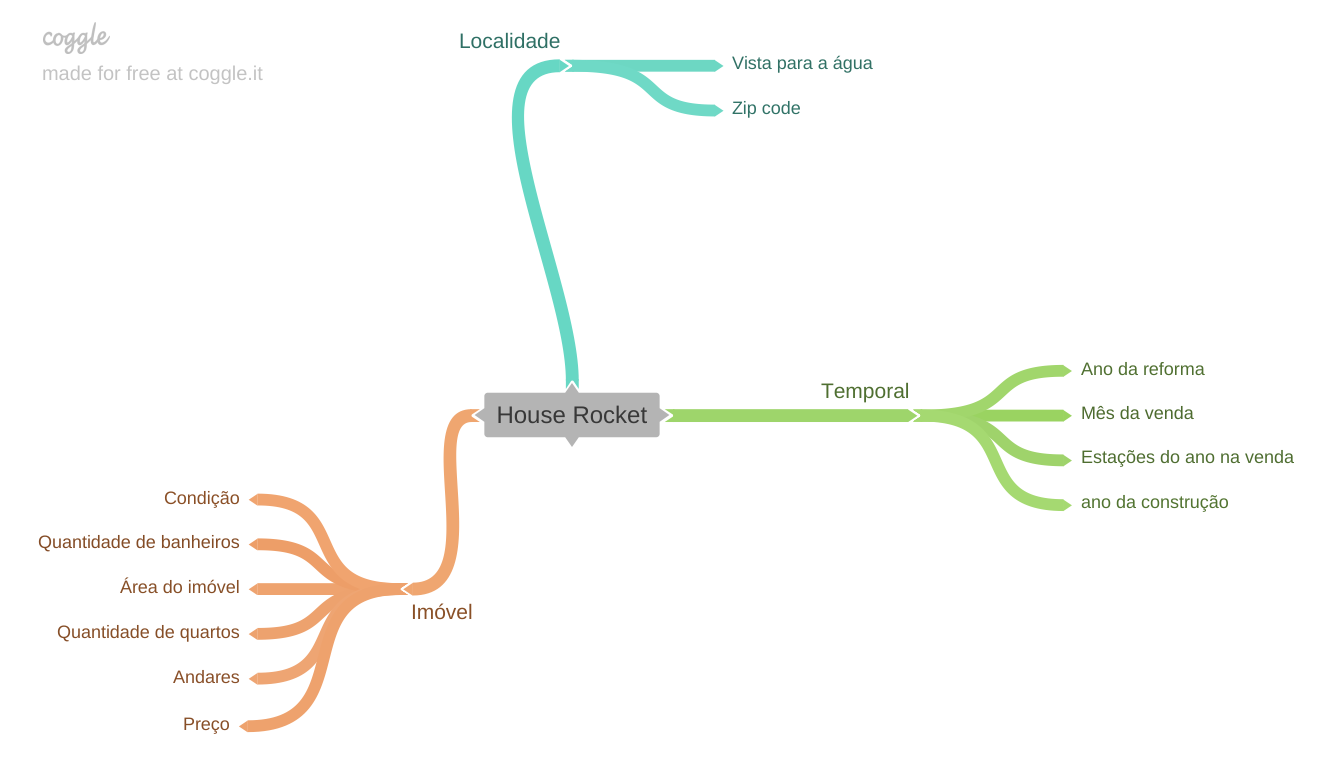

In [13]:
Image('img/House_rocket.png')

## 3.2 - Feature Engineering

In [14]:
# Mês
df3['month_date'] = df3['date'].dt.month
df3['month_date_str'] = df3['month_date'].apply(lambda x: '%02d' % x if x < 10 else x)

# Ano
df3['year_date'] = df3['date'].dt.year

# Ano - mês
df3['year_month'] = df3['year_date'].astype(str) + '-' + df3['month_date_str'].astype(str)

# Estações do ano
df3['season'] = df3['month_date'].apply(lambda x: 
                                            'verao' if (x >= 6) & (x <= 8) else
                                            'outono' if (x >= 9) & (x <= 11) else
                                            'primavera' if (x >= 3) & (x <= 5) else 'inverno')

# Cômodos
df3['comodos'] = 'banheiros: ' + df3['bathrooms'].astype(str) + ' / ' + 'quartos: ' + df3['bedrooms'].astype(str)

In [26]:
df3[df3['id'].duplicated(keep=False)].head(6)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_date,month_date_str,year_date,year_month,season,comodos
93,6021501535,2014-07-25,430000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,7,07,2014,2014-07,verao,banheiros: 1.5 / quartos: 3
94,6021501535,2014-12-23,700000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,12,12,2014,2014-12,inverno,banheiros: 1.5 / quartos: 3
313,4139480200,2014-06-18,1384000.0,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,6,06,2014,2014-06,verao,banheiros: 3.25 / quartos: 4
314,4139480200,2014-12-09,1400000.0,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,12,12,2014,2014-12,inverno,banheiros: 3.25 / quartos: 4
324,7520000520,2014-09-05,232000.0,2,1.00,1240,12092,1.0,0,0,3,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460,9,09,2014,2014-09,outono,banheiros: 1.0 / quartos: 2
325,7520000520,2015-03-11,240500.0,2,1.00,1240,12092,1.0,0,0,3,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460,3,03,2015,2015-03,primavera,banheiros: 1.0 / quartos: 2


# 4 - Análise Exploratória de Dados (EDA)

In [16]:
df4 = df3.copy()

## 4.1 - Análise Bivariada com levantamento de hipóteses

### Hipótese 1 - Imóveis com vista para o lago são mais caros
**Verdadeiro**, o valor dos imóveis com vista para o mar é mais que o dobro na média

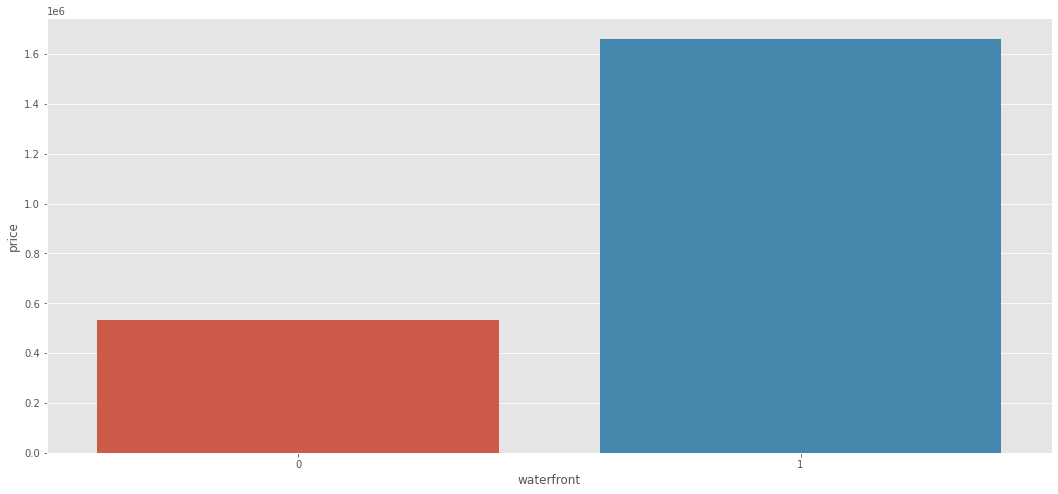

In [17]:
aux = price_mean(df4, 'waterfront')
sns.barplot(x='waterfront', y='price', data=aux);

### Hipótese 2 - A localidade do imóvel afeta no preço
**Verdadeiro**, pois a localidade afeta na média das preços

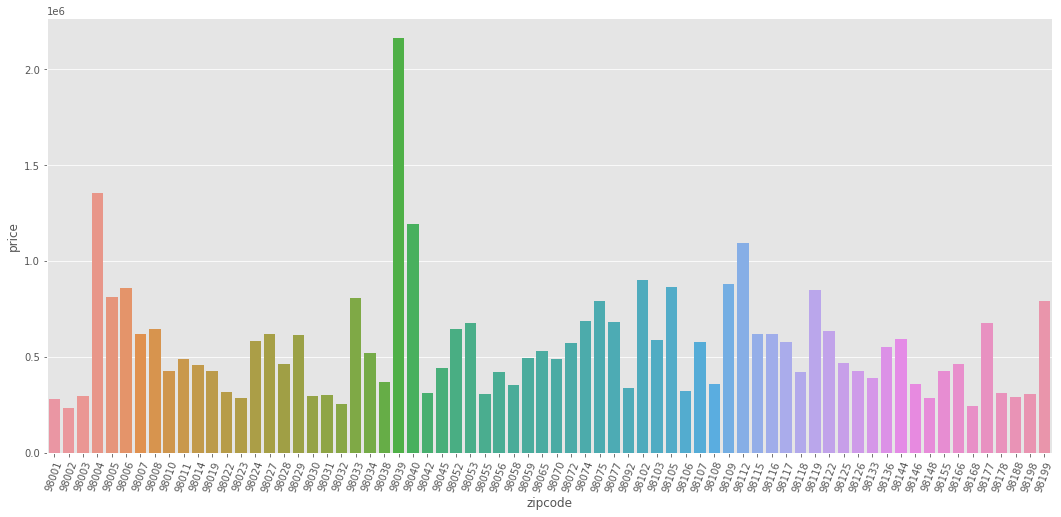

In [18]:
aux = price_mean(df4, 'zipcode')
sns.barplot(x='zipcode', y='price', data=aux)
plt.xticks(rotation=70);

### Hipótese 3 - Imóveis sem reforma custam menos
**Falso**, pois há imóveis que foram reformadados e que custam menos

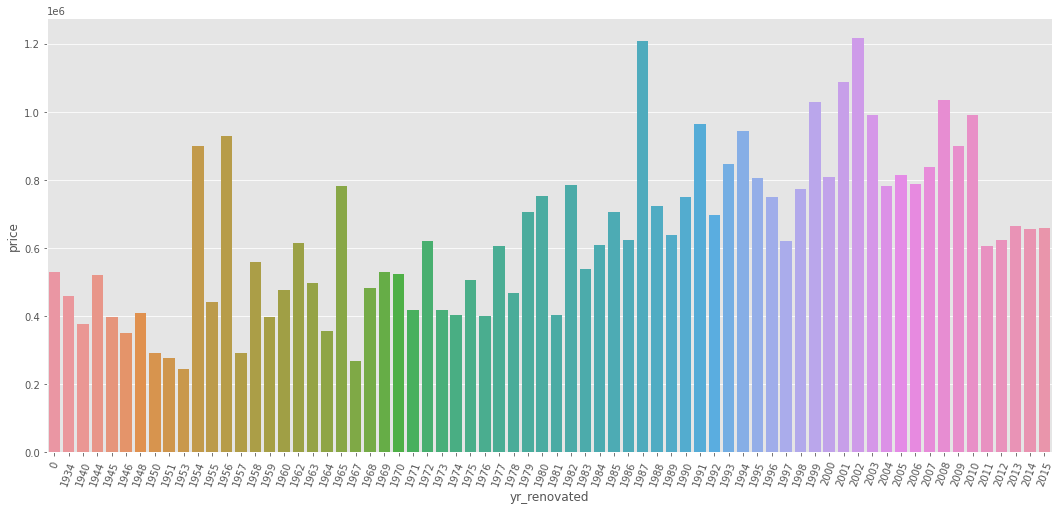

In [19]:
aux = price_mean(df4, 'yr_renovated')
sns.barplot(x='yr_renovated', y='price', data=aux)
plt.xticks(rotation=70);

### Hipótese 4 - Imóveis com a construção mais antigas são mais baratas
**Falso**, pois há imóveis com construção mais recente que custam menos

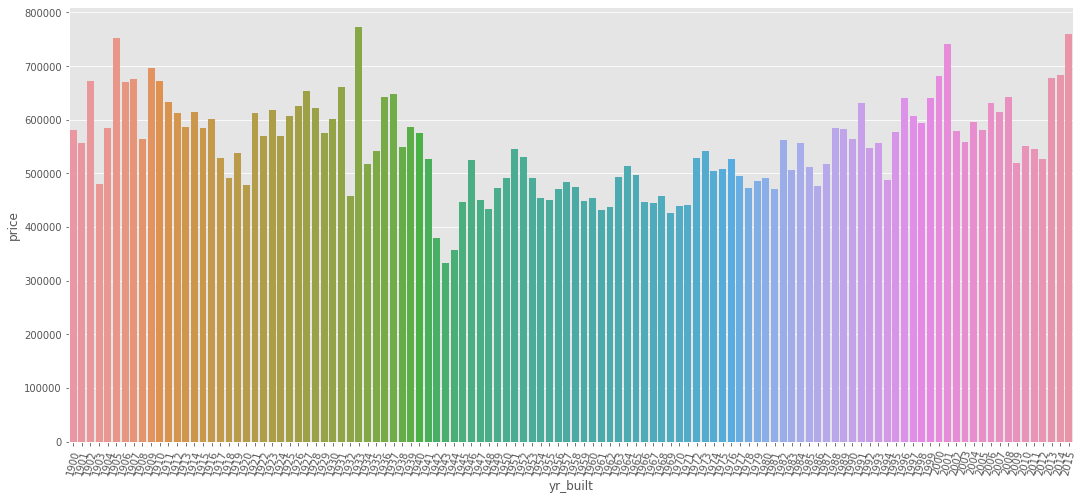

In [20]:
aux = price_mean(df4, 'yr_built')
sns.barplot(x='yr_built', y='price', data=aux)
plt.xticks(rotation=75);

### Hipótese 5 - Imóveis são mais caros no inverno
**Falso**, pois a média dos preços no inverno são menores

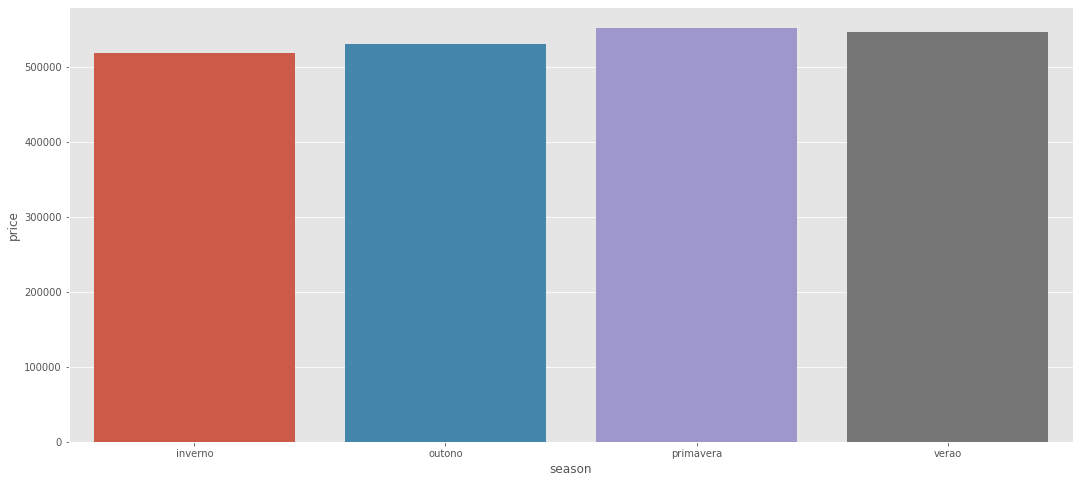

In [21]:
aux = price_mean(df4, 'season')
sns.barplot(x='season', y='price', data=aux);

### Hipótese 6 - Imóveis em piores condições são mais baratas
**Verdadeiro**, pois os imóveis de níveis 1 e 2 são aproximadamente metade do valor dos outro níveis, na média

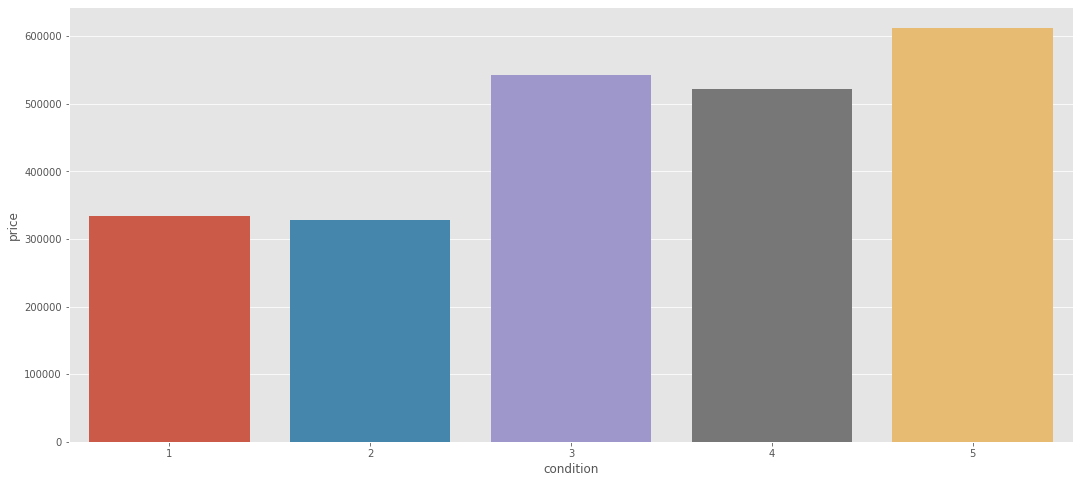

In [22]:
aux = price_mean(df4, 'condition')
sns.barplot(x='condition', y='price', data=aux);

### Hipótese 7 - Imóveis com mais de cômodos são mais caras
**Falso**, imóveis com mais banheiros costumam ser mais caros, porém, o mesmo não se aplica aos quartos

In [23]:
price_mean(df4, 'comodos').sort_values('price', ascending=False)

,comodos,price
142,banheiros: 8.0 / quartos: 6,7.700000e+06
141,banheiros: 7.75 / quartos: 6,6.885000e+06
133,banheiros: 6.0 / quartos: 6,5.300000e+06
138,banheiros: 6.75 / quartos: 5,4.668000e+06
130,banheiros: 5.75 / quartos: 5,3.745000e+06
...,...,...
5,banheiros: 0.75 / quartos: 0,2.650000e+05
2,banheiros: 0.5 / quartos: 1,2.550000e+05
6,banheiros: 0.75 / quartos: 1,2.510537e+05
10,banheiros: 1.0 / quartos: 0,2.280000e+05


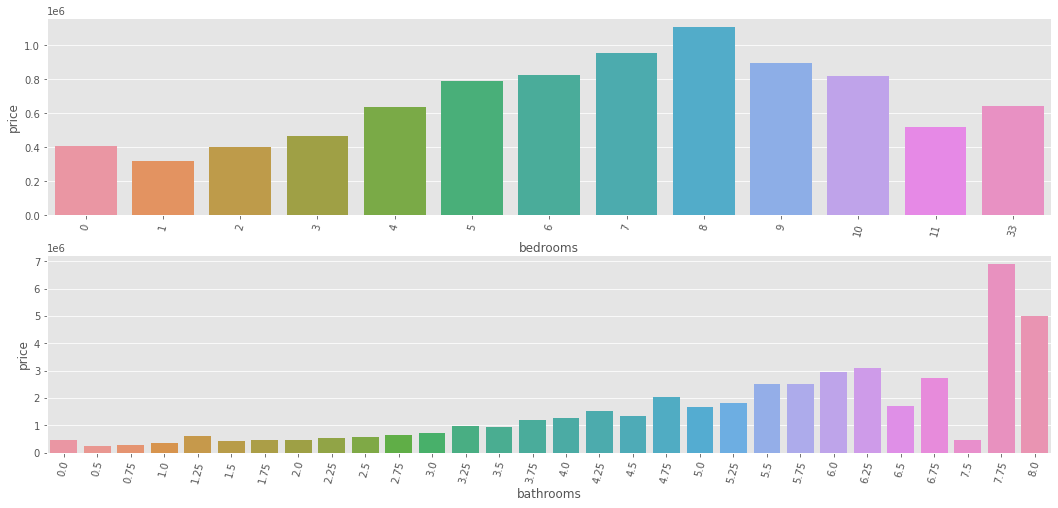

In [24]:
aux = price_mean(df4, 'bedrooms')
aux2 = price_mean(df4, 'bathrooms')

plt.subplot(2,1,1)
sns.barplot(x='bedrooms', y='price', data=aux)
plt.xticks(rotation=75)

plt.subplot(2,1,2)
sns.barplot(x='bathrooms', y='price', data=aux2)
plt.xticks(rotation=75);

### Hipótese 8 - O valor médio dos imóveis ficaram mais caras no decorrer dos meses
**Falso**, pois há meses em que a média dos preços caem

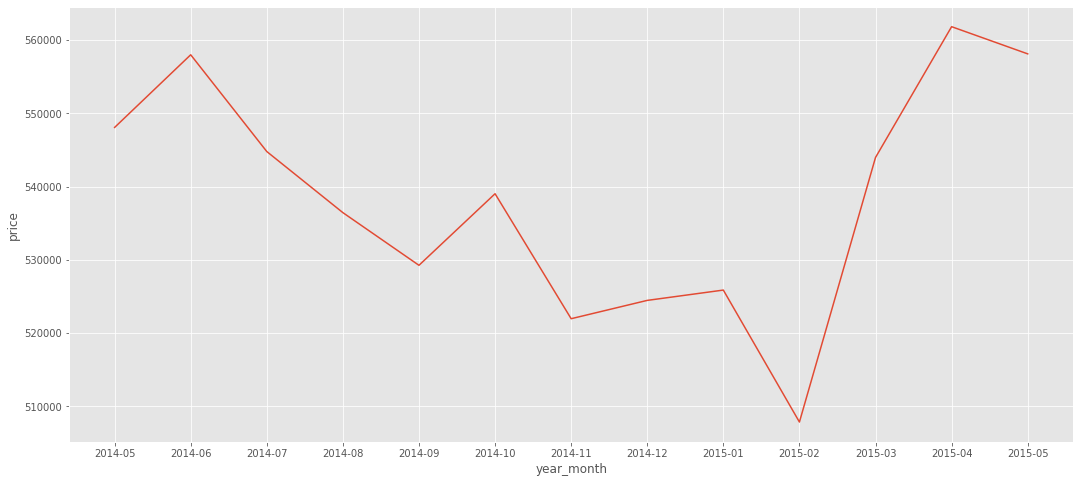

In [25]:
aux = price_mean(df4, 'year_month')
sns.lineplot(x='year_month', y='price', data=aux);

## 4.2 - Análise Multivariada

In [27]:
df4.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month_date',
       'month_date_str', 'year_date', 'year_month', 'season', 'comodos'],
      dtype='object')

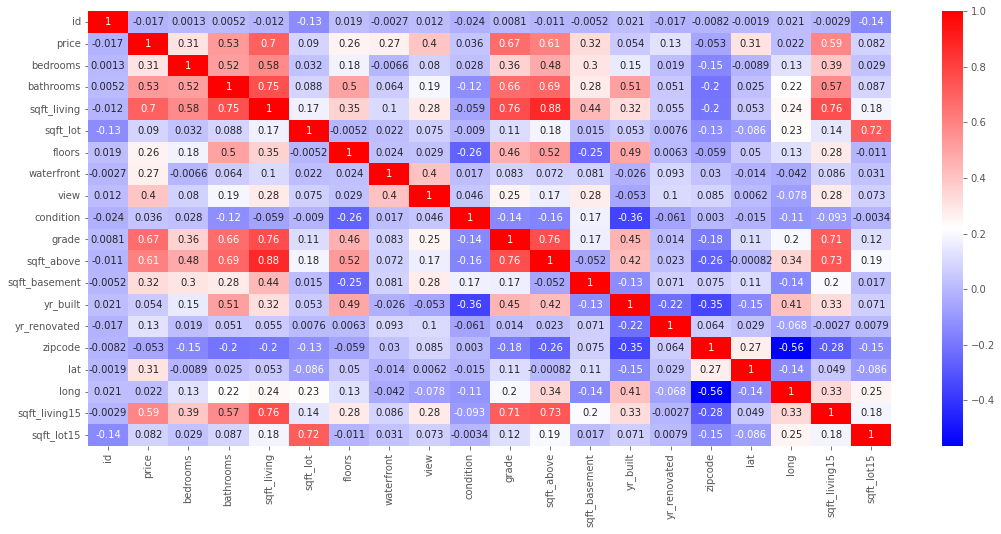

In [30]:
aux = df4.drop(['month_date', 'month_date_str', 'year_date', 'year_month', 'comodos'], axis=1)
corr = aux.corr()
sns.heatmap(corr, annot=True, cmap='bwr');

# 5 - Recomendações de compra e venda

In [39]:
df5 = df4.copy()
df5.drop(['month_date', 'month_date_str', 'year_date', 'year_month', 'comodos'], axis=1, inplace=True)

## 5.1 - Recomendação de compra

In [102]:
comprar = df5.copy()

# Groupby para conseguir a mediana com base no zipcode
aux = price_median(df5, ['zipcode', 'waterfront'])
aux.rename(columns={'price':'mediana'}, inplace=True)

# Unindo a mediana no dataframe
comprar = pd.merge(comprar, aux, how='left', on=['zipcode', 'waterfront'])

# Condições
comprar['comprar'] = np.where((comprar['condition'] <= 2) | (comprar['price'] < comprar['mediana']), 'nao comprar', 'comprar')

aux_comprar = comprar[comprar['comprar'] == 'comprar']
aux_n_comprar = comprar[comprar['comprar'] == 'nao comprar']
gasto = aux_comprar['price'].sum()

print(f'O dataset possui {len(aux_comprar)} imóveis para comprar')
print(f'O dataset possui {len(aux_n_comprar)} imóveis para não comprar')
print(f'O gasto total será de {gasto}')

comprar.to_csv('recomendacao_compra.csv')

O dataset possui 10837 imóveis para comprar
O dataset possui 10776 imóveis para não comprar
O gasto total será de 7473783752.0


## 5.2 - Recomendação de venda

In [107]:
vender = aux_comprar.drop(['comprar', 'mediana'], axis=1)

# Groupby para conseguir a mediana com base no zipcode e season
aux = price_median(df5, ['zipcode', 'waterfront', 'season'])
aux.rename(columns={'price':'mediana'}, inplace=True)

# Unindo a mediana no dataframe
vender = pd.merge(vender, aux, how='left', on=['zipcode', 'waterfront', 'season'])

# Condições
vender['preco_venda'] = np.where(vender['price'] >= vender['mediana'], vender['price'] + (vender['price'] * 0.), vender['price'] + (vender['price'] * 0.3))

lucro = vender['preco_venda'].sum()

print(f'O lucro total será de {round(lucro, 2)}')

vender.to_csv('recomendacao_venda.csv')

O lucro total será de 7543421216.9


## 5.3 - Receita Final

In [109]:
round(lucro - gasto, 2)

69637464.9